<a href="https://colab.research.google.com/github/mustafabozkaya/AI-ML-DL-DS_Projects_Portfolio/blob/master/House_price_prediction/house_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-12-19 21:56:12--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.04s   

2023-12-19 21:56:13 (37.7 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("housing.csv")

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


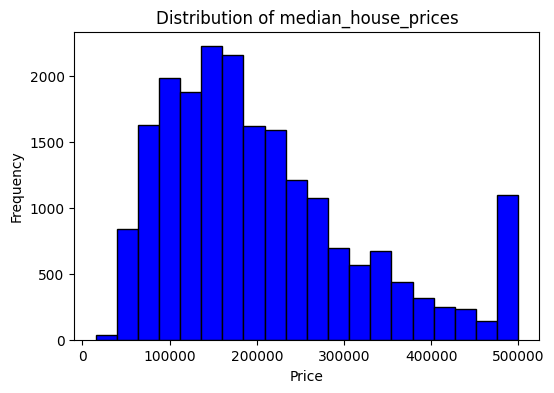

In [7]:
plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value, bins=20, color='blue', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of median_house_prices')

plt.show()

In [8]:
df['ocean_proximity'].describe()

count         20640
unique            5
top       <1H OCEAN
freq           9136
Name: ocean_proximity, dtype: object

In [9]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])].ocean_proximity

701      <1H OCEAN
830      <1H OCEAN
859      <1H OCEAN
860      <1H OCEAN
861      <1H OCEAN
           ...    
20635       INLAND
20636       INLAND
20637       INLAND
20638       INLAND
20639       INLAND
Name: ocean_proximity, Length: 15687, dtype: object

In [11]:
df = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]

In [12]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


In [13]:
df.shape

(15687, 10)

## Let's look at the distribution of median_house_value values of the remaining data again

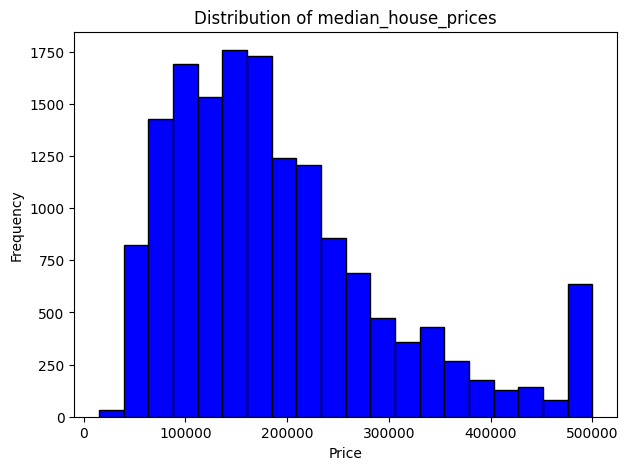

In [14]:
plt.figure(figsize=(7, 5))

sns.histplot(df.median_house_value, bins=20, color='blue', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of median_house_prices')

plt.show()

In [15]:
columns = [
    "longitude",
    "latitude",
    "housing_median_age",
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
    "median_income",
    "median_house_value"
]

df = df[columns]

**Question 1**: Feature with missing values

In [16]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [17]:
df[df.total_bedrooms.isnull()==True].total_bedrooms

1097    NaN
1350    NaN
1456    NaN
2028    NaN
2115    NaN
         ..
20069   NaN
20125   NaN
20372   NaN
20460   NaN
20484   NaN
Name: total_bedrooms, Length: 157, dtype: float64

Answer: `total_bedrooms`

**Question 2**: Median for population

In [18]:
df['population'].median()

1195.0

Splitting and preparing the dataset

In [19]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


In [20]:
n = len(df)
n

15687

In [21]:

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

n_val, n_test, n_train

(3137, 3137, 9413)

In [27]:

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]
idx

array([15183,  4469,  9316, ...,  5390,   860,  7270])

In [28]:
df.iloc[idx[:5]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [30]:
df_shuffled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [31]:
df_shuffled.iloc[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [32]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [33]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
1,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
2,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
3,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
4,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [34]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [35]:
df_train.shape

(9413, 8)

**Question 3**: Mean vs zero

In [36]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

def prepare_X(df, fillna_value):
    df = df.fillna(fillna_value)
    X = df
    return X

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [37]:
df_train[df_train.total_bedrooms.isnull()==True].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
107,-117.98,33.73,18.0,3833.0,NaN,2192.0,996.0,3.4679
306,-118.37,34.07,50.0,2519.0,NaN,1117.0,516.0,4.3667
348,-119.73,36.83,8.0,3602.0,NaN,1959.0,580.0,5.3478
378,-121.13,38.87,48.0,1127.0,NaN,530.0,186.0,3.0917
407,-119.44,36.58,37.0,1054.0,NaN,879.0,257.0,2.5234


In [38]:
mean = df_train.total_bedrooms.mean()

mean

542.552956325786

with mean:

In [39]:
X_train = prepare_X(df_train, fillna_value=mean)
X_train. iloc[[107,306,348,378,407]] # We filled the nan-valued cells with mean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
107,-117.98,33.73,18.0,3833.0,542.552956,2192.0,996.0,3.4679
306,-118.37,34.07,50.0,2519.0,542.552956,1117.0,516.0,4.3667
348,-119.73,36.83,8.0,3602.0,542.552956,1959.0,580.0,5.3478
378,-121.13,38.87,48.0,1127.0,542.552956,530.0,186.0,3.0917
407,-119.44,36.58,37.0,1054.0,542.552956,879.0,257.0,2.5234


In [40]:
w_0, w = train_linear_regression(X_train.values, y_train)

X_val = prepare_X(df_val, fillna_value=mean)
y_pred = w_0 + X_val.values.dot(w)

rmse(y_val, y_pred)

0.34056998014451195

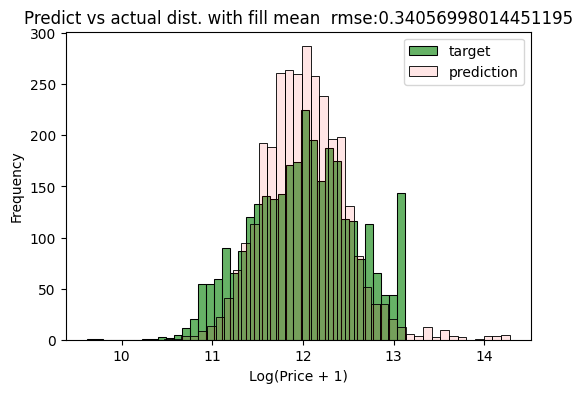

In [41]:
plt.figure(figsize=(6, 4))

sns.histplot(y_val, label='target', color='green', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='red', alpha=0.1, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predict vs actual dist. with fill mean  rmse:%s' % rmse(y_val, y_pred))

plt.show()

with 0:

In [42]:
X_train = prepare_X(df_train, fillna_value=0)
w_0, w = train_linear_regression(X_train.values, y_train)

X_val = prepare_X(df_val, fillna_value=0)
y_pred = w_0 + X_val.values.dot(w)

rmse(y_val, y_pred)

0.34084790341633553

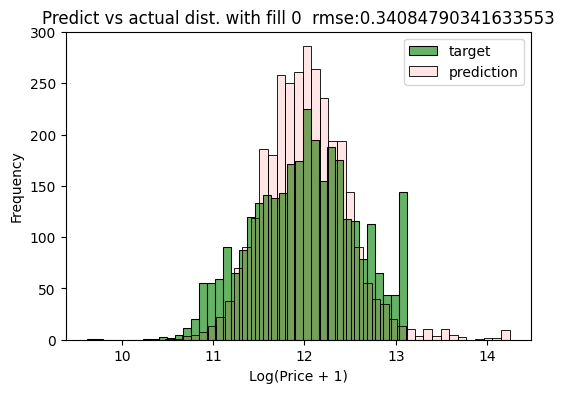

In [43]:
plt.figure(figsize=(6, 4))

sns.histplot(y_val, label='target', color='green', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='red', alpha=0.1, bins=40)
plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predict vs actual dist. with fill 0  rmse:%s' % rmse(y_val, y_pred))

plt.show()

The answer: **Both are equally good**

**Question 4**: Regularization

In [51]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [63]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_pred)
    print('%06s %0.4f' % (r, round(rmse_val, 3)))

     0 0.3340
 1e-06 0.3340
0.0001 0.3340
 0.001 0.3340
  0.01 0.3340
   0.1 0.3340
     1 0.3370
     5 0.3390
    10 0.3400


The answer: `r=0.001`

**Question 5**: Standard deviation of RMSE

In [54]:
rmses = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n) # configure of the seed number
    np.random.seed(s)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(y_train_orig)
    y_val = np.log1p(y_val_orig)
    y_test = np.log1p(y_test_orig)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    X_train = prepare_X(df_train, fillna_value=0)
    w_0, w = train_linear_regression_reg(X_train.values, y_train, r=0.001)

    X_val = prepare_X(df_val, fillna_value=0)
    y_pred = w_0 + X_val.values.dot(w)

    result = rmse(y_val, y_pred)
    print(s, result)

    rmses.append(result)

0 0.33774075286122995
1 0.33780506863750864
2 0.33843213686201035
3 0.33200368220877613
4 0.3394519311259676
5 0.34337748672703033
6 0.33853132218712534
7 0.34687013093778823
8 0.35127603765624366
9 0.33415301881100345


In [47]:
np.std(rmses)

0.005465718180951369

In [62]:
round(np.std(rmses), 3)

0.005

**Question 6**: RMSE for Test

In [66]:
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

df_test = df_test.reset_index(drop=True)

y_train_orig = df_full_train.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(y_train_orig)
y_test = np.log1p(y_test_orig)

del df_full_train['median_house_value']
del df_test['median_house_value']

df_full_train.shape, df_test.shape

((12550, 8), (3137, 8))

In [67]:
X_train = prepare_X(df_full_train, fillna_value=0)
w_0, w = train_linear_regression_reg(X_train.values, y_train, r=0.001)

X_test = prepare_X(df_test, fillna_value=0)
y_pred = w_0 + X_test.values.dot(w)

result = rmse(y_test, y_pred)
print(result)

0.3349899336611418
